In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Avaliando um Modelo #
Na ciência de dados, um *modelo* é um conjunto de suposições sobre os dados. Frequentemente, modelos incluem suposições sobre processos aleatórios usados para gerar dados.

Às vezes, os cientistas de dados precisam decidir se um modelo é bom ou não. Nesta seção, discutiremos um exemplo de como tomar essa decisão.

## Seleção de Jurados ##

A ciência de dados pode ser uma ferramenta poderosa para expor o racismo e a desigualdade em nossa sociedade. Esta seção trata de um caso em que dados forneceram evidências de viés racial na seleção de jurados.

A Sexta Emenda da Constituição dos Estados Unidos afirma que, "Em todos os processos criminais, o acusado gozará do direito a um julgamento rápido e público, por um júri imparcial do Estado e distrito onde o crime tiver sido cometido." 

Uma característica de um júri *imparcial* é que ele deve ser selecionado a partir de um painel de jurados que seja representativo da população da região relevante. Um painel de jurados é um grupo de pessoas escolhidas para serem jurados potenciais. O júri final do julgamento é selecionado entre eles por inclusão ou exclusão deliberada e, como resultado, pode ter qualquer composição. Mas o painel maior do qual os jurados são selecionados deve ser representativo da população.

A questão de saber se um painel de jurados é de fato representativo da população de uma região tem uma implicação legal importante. Se algum grupo na população foi sistematicamente sub-representado no painel de jurados, isso poderia levantar uma questão sobre se o júri era imparcial e, portanto, se o réu recebeu o devido processo legal.

Essa foi a questão no caso da Suprema Corte de Robert Swain, um homem negro condenado no Condado de Talladega, Alabama, em 1962. Ele apelou sua acusação até a Suprema Corte dos EUA com o argumento de que os negros eram sistematicamente excluídos dos júris no Condado de Talladega. A Suprema Corte negou seu recurso e Robert Swain foi posteriormente condenado à prisão perpétua.

No entanto, nossa análise abaixo mostra que os dados não concordam com as conclusões tiradas pela Corte. Pelo contrário, os dados apontam para um viés no processo de seleção do júri. Esse viés no sistema de justiça criminal refletia o preconceito e a injustiça generalizados contra os negros na época.

Vamos começar examinando os detalhes numéricos. Na época do julgamento, apenas homens com 21 anos ou mais eram elegíveis para servir como jurados no Condado de Talladega. Nessa população, 26% dos homens eram negros. Como é comum em julgamentos com júri, os jurados no julgamento de Robert Swain foram selecionados de um painel de pessoas que deveriam ser representativas da população de jurados elegíveis. Mas apenas oito homens entre os 100 homens do painel (ou seja, 8%) eram negros.

Como parte de seu recurso, Robert Swain questionou essa discrepância. Além disso, ele apontou que todos os painéis de júri do Condado de Talladega nos últimos 10 anos continham apenas uma pequena porcentagem de jurados negros.

A Suprema Corte dos EUA revisou o recurso e concluiu: "a disparidade percentual geral tem sido pequena". Mas essa afirmação era razoável? Se os jurados do painel fossem selecionados aleatoriamente da população elegível do condado, haveria alguma variação ao acaso. Não teríamos exatamente 26 jurados negros em cada painel de 100 pessoas. Mas esperaríamos ter apenas oito?

A resposta é não. Vamos estabelecer isso e, em seguida, discutir alguns dos muitos vieses envolvidos.

## Um Modelo de Seleção Aleatória ##

Uma visão dos dados – um modelo, em outras palavras – é que o painel foi selecionado aleatoriamente e acabou com um pequeno número de jurados negros apenas devido ao acaso.

Como o painel deveria se assemelhar à população de todos os jurados elegíveis, o modelo de seleção aleatória é importante de avaliar. Vamos ver se ele resiste à análise.

O modelo especifica os detalhes de um processo aleatório. Ele diz que os dados são como uma amostra aleatória de uma população em que 26% das pessoas são negras. Estamos em uma boa posição para avaliar esse modelo pelas seguintes razões.

- Podemos simular dados com base no modelo. Ou seja, podemos simular sorteios aleatórios de uma população em que 26% são negros.
- Nossa simulação mostrará como seria um painel ***se*** fosse selecionado aleatoriamente.
- Podemos então comparar os resultados da simulação com a composição de um painel de júri real.
- Se os resultados da nossa simulação não forem consistentes com a composição do painel no julgamento, isso será uma evidência contra o modelo de seleção aleatória. Portanto, será uma evidência contra a imparcialidade do julgamento.

Vamos passar por esse processo passo a passo.

## A Estatística ##
Primeiro, temos que escolher uma estatística para simular. A estatística precisa nos ajudar a decidir entre o modelo e as visões alternativas sobre os dados. O modelo diz que o painel foi selecionado aleatoriamente da população elegível. A visão alternativa é o caso de Robert Swain, que afirma que o painel continha poucos jurados negros para ter sido selecionado aleatoriamente. Uma estatística natural, então, é o número ou *contagem* de jurados negros na amostra. Valores pequenos da estatística favorecerão a visão de Robert Swain.

## Simulando a Estatística Sob o Modelo ##
Se o modelo fosse verdadeiro, quão grande seria a estatística tipicamente? Para responder a isso, simularemos a estatística sob a suposição de seleção aleatória e observaremos a distribuição dos resultados.

### Simulando Um Valor da Estatística ###

Podemos usar `sample_proportions` para simular um valor da estatística. O tamanho da amostra é 100, o tamanho do painel. A distribuição da qual amostraremos é a distribuição na população de jurados elegíveis. Como 26% deles eram negros, amostraremos da distribuição especificada pelas proporções [0.26, 0.74].

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

As categorias na matriz de saída de `sample_proportions` estão na mesma ordem que na matriz de entrada. Portanto, a proporção de membros do painel negros na amostra aleatória é `item (0)` da matriz de saída. Execute a célula abaixo de alguns vezes para ver como a proporção da amostra de jurados negros varia em um painel selecionado aleatoriamente. Você vê algum valor tão baixo quanto 0,08?

In [3]:
sample_proportions(sample_size, eligible_population).item(0)

0.27

A contagem em cada categoria é o tamanho da amostra vezes a proporção correspondente. Portanto, podemos facilmente simular contagens em vez de proporções. 

Vamos definir uma função que faça isso. A função sorteará um painel aleatoriamente e retornará o número de painelistas que são negros.

In [4]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

### Simulando Múltiplos Valores da Estatística ###

O foco da nossa análise é a variabilidade nas contagens. Vamos gerar 10.000 valores simulados da contagem e ver como eles variam. Como de costume, faremos isso usando um loop `for` e coletando todas as contagens simuladas em um array .

In [5]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

## A Previsão sob o Modelo de Seleção Aleatória ##
Para interpretar os resultados da nossa simulação, podemos visualizar os resultados em um histograma empírico das contagens simuladas.

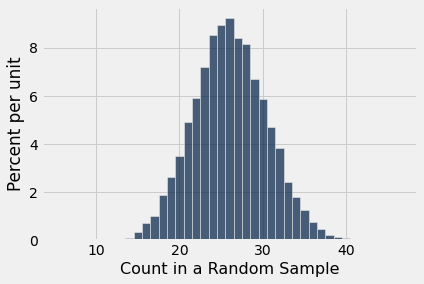

In [6]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

O histograma nos mostra o que o modelo de seleção aleatória prevê sobre nossa estatística, o número de jurados negros na amostra.

Para gerar cada contagem simulada, extraímos 100 vezes aleatoriamente de uma população em que 26% eram negros. Então, como era de se esperar, a maioria das contagens simuladas está em torno de 26. Elas não são exatamente 26: há alguma variação. As contagens variam de cerca de 15 a cerca de 40.

## Comparando a Previsão e os Dados ##
No painel selecionado para o julgamento, havia oito jurados negros. O histograma de contagens simuladas é redesenhado abaixo com o valor oito mostrado como um ponto vermelho no eixo horizontal. O ponto está muito longe na cauda esquerda do histograma. Pouquíssimas das 10.000 contagens simuladas por seleção aleatória resultaram em oito ou menos.

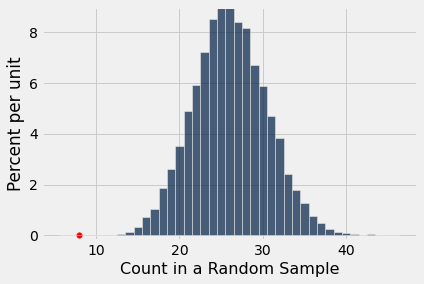

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## Conclusão da Análise de Dados ##

O gráfico acima é uma exibição visual do viés no processo de seleção. Ele mostra que, se selecionarmos um painel de tamanho 100 aleatoriamente da população elegível, é muito improvável obter contagens de jurados negros tão baixas quanto os oito observados no painel do julgamento.

Isso é uma evidência de que o modelo de seleção aleatória dos jurados no painel não é consistente com os dados do painel. Embora seja *possível* que o painel tenha sido gerado por acaso, nossa simulação demonstra que é extremamente improvável.

A realidade do painel de julgamento está muito em desacordo com a suposição do modelo de seleção aleatória da população elegível. Quando os dados e um modelo são inconsistentes, o modelo é difícil de justificar. Afinal, os dados são reais. O modelo é apenas um conjunto de suposições. Quando as suposições estão em desacordo com a realidade, devemos questionar essas suposições.

Portanto, a conclusão mais razoável é que a suposição de seleção aleatória é injustificada para este painel do júri. Em outras palavras, a conclusão mais razoável é que o painel do júri *não* foi selecionado por amostragem aleatória da população de jurados elegíveis. Não obstante a opinião da Suprema Corte, a diferença entre 26% e 8% não é tão pequena que possa ser bem explicada apenas pelo acaso.

## Viés Estatístico ##

A análise acima fornece evidências quantitativas de injustiça no julgamento de Robert Swain. Os dados apoiam sua posição de que ele foi negado o júri imparcial ao qual tinha direito pela Constituição dos EUA.

Dados adicionais mostram que a exclusão de jurados negros era generalizada. O julgamento da Suprema Corte, escrito em 1965, inclui evidências fornecidas por Robert Swain de que "apenas 10 a 15% dos painéis de jurados sorteados desde 1953 eram [negros], havendo apenas um caso em que a porcentagem foi tão alta quanto 23%." Observe onde 10% e 15% estão no eixo horizontal do histograma acima. Valores como esses também são altamente improváveis sob seleção aleatória da população elegível.

Quando um processo produz erros que são sistematicamente em uma direção – como a porcentagem de jurados negros sendo sempre menor do que o esperado – então os cientistas de dados dizem que o processo é *enviesado*. A quantificação de tal viés é uma responsabilidade importante da ciência de dados.

Argumentos como o da seção anterior são agora mais frequentemente apresentados nos tribunais. Nos anos 1960, a Suprema Corte olhou para os dados, mas tirou a conclusão errada de que "a disparidade percentual geral foi pequena". Para o significado de "pequena", foi errado confiar no que simplesmente parecia razoável para a maioria do Tribunal. As opiniões sobre o que era razoável não eram apenas puramente subjetivas, mas também vulneráveis à influência de preconceitos raciais generalizados. Se os argumentos no caso tivessem incluído a análise quantitativa desta seção, o Tribunal talvez não tivesse concluído que a disparidade percentual era pequena.

## Viés Racial ##
O viés estatístico no processo de seleção nasceu de um profundo viés racial no sistema jurídico da época.

Por exemplo, o julgamento da Suprema Corte diz que os painéis de jurados do Condado de Talladega foram selecionados a partir de uma lista de nomes que os comissários do júri adquiriram de "diretórios da cidade, listas de registro, listas de clubes e igrejas, conversas com outras pessoas na comunidade, tanto brancas quanto [não brancas], e conhecidos pessoais e profissionais." Este processo era claramente enviesado contra as pessoas negras e a favor das pessoas nos círculos sociais e profissionais dos comissários. Essa exclusão sistemática de pessoas negras das listas de jurados significava que muito poucas pessoas negras eram selecionadas para os painéis de jurados.

Mesmo quando havia jurados negros, eles geralmente não chegavam ao júri final. Dos oito homens negros no painel de jurados de Robert Swain, dois foram dispensados e seis foram eliminados pela acusação em um processo chamado *desafio peremptório*. Neste processo, os advogados de ambos os lados podiam excluir ou *desafiar* um certo número de jurados sem dar uma razão.

Argumentar contra a injustiça dos desafios peremptórios foi uma parte significativa do recurso de Robert Swain. Ele observou que "os promotores têm consistentemente e sistematicamente exercido seus desafios para impedir que qualquer [jurado negro] servisse no próprio [júri]." O Tribunal reconheceu que nunca houve um jurado negro em nenhum caso civil ou criminal no Condado de Talladega. Mas ainda assim negou o recurso.

O viés racial no sistema jurídico derivou do viés na sociedade. O preconceito e a injustiça contra os negros eram tão prevalentes por tanto tempo que, em muitas partes da sociedade, se tornou quase uma forma normal de pensar e agir. Como membros da sociedade, os juízes da Suprema Corte não estavam imunes a isso. A maioria do Tribunal apresentou sua decisão como a interpretação mais apropriada e lógica da lei. Mas não era. A decisão do Tribunal sobre os desafios peremptórios foi eventualmente revertida após batalhas legais que duraram 20 anos.

Robert Swain lutou contra um sistema de justiça criminal que estava contra ele. Aqui, pudemos expor apenas um aspecto do viés e racismo sistêmico que ele enfrentou e que tantas outras pessoas negras têm lutado contra. Para muitos, a luta continua até hoje. Acreditamos que a ciência de dados pode ser um poderoso aliado.

## Leitura Adicional ##

Robert Swain foi representado na Suprema Corte dos EUA por [Constance Baker Motley](https://en.wikipedia.org/wiki/Constance_Baker_Motley), a primeira mulher afro-americana a defender um caso nessa Corte. Ela defendeu 10 casos na Suprema Corte e perdeu apenas um – o caso de Robert Swain em 1965.

[Thurgood Marshall](https://en.wikipedia.org/wiki/Thurgood_Marshall), que em 1967 se tornou o primeiro juiz afro-americano da Suprema Corte, estudou a decisão do Tribunal no caso de Robert Swain e pressionou pela eliminação dos desafios peremptórios baseados apenas na raça. Isso foi alcançado no caso da Suprema Corte de 1986 [Batson v. Kentucky](https://supreme.justia.com/cases/federal/us/476/79/).

Mas Marshall tinha preocupações sobre a eficácia da decisão Batson. Ele previu que algumas equipes jurídicas contornariam isso encontrando maneiras ostensivamente neutras em relação à raça para excluir jurados negros. Em sua [opinião](https://supreme.justia.com/cases/federal/us/476/79/#tab-opinion-1956655) concordando com a maioria do Tribunal, ele recomendou ir além e banir os desafios peremptórios completamente. Suas palavras finais foram: "Aplaudo a decisão do Tribunal de que o uso discriminatório racial dos desafios peremptórios viola a Cláusula de Proteção Igualitária, e concordo com a opinião do Tribunal. No entanto, apenas banindo totalmente os desafios peremptórios essa discriminação pode ser eliminada." As preocupações de Thurgood Marshall foram prescientes, como você verá em algumas das leituras abaixo.

Em 2013, Constance Baker Motley foi postumamente homenageada com uma [medalha de ouro do Congresso](https://www.congress.gov/bill/113th-congress/house-bill/3097/text?r=5&s=1) "em reconhecimento às suas contribuições e serviço duradouro aos Estados Unidos." Em apoio ao prêmio, membros da Câmara dos Representantes escreveram: "A única perda de Constance Baker Motley perante a Suprema Corte dos Estados Unidos foi no caso Swain v. Alabama, 380 U.S. 202 (1965), um caso em que o Tribunal se recusou a proibir desafios peremptórios baseados em raça em casos envolvendo réus afro-americanos e que foi posteriormente revertido no caso Batson v. Kentucky, 476 U.S. 79 (1986), com base em argumentos amplamente apresentados por Constance Baker Motley no caso Swain."

Thurgood Marshall e Constance Baker Motley tinham outras conexões. Por exemplo, como estudante na Faculdade de Direito de Columbia, Baker Motley trabalhou como assistente jurídica para Marshall. Alguns anos depois, ela escreveu a queixa original no marco histórico de direitos civis Brown v. Board of Education em Topeka, que foi vencido por Thurgood Marshall em 1954.

O [Fundo de Defesa Legal e Educacional da NAACP](https://www.naacpldf.org/) defendeu o [caso de Robert Swain](https://www.naacpldf.org/press-release/ldf-marks-anniversary-of-batson-decision-reaffirms-importance-of-impartial-jury-selection/) e posteriormente apoiou o caso Batson.

Apesar da decisão Batson, o viés racial na seleção de jurados persiste. O acadêmico jurídico e ex-aluno da Faculdade de Direito de Berkeley [Richard L. Harris Jr.](https://www.thehistorymakers.org/biography/robert-lewis-harris) forneceu um [relato detalhado](https://scholarship.law.wm.edu/cgi/viewcontent.cgi?article=1944&context=wmlr) dos vieses perpetuados pelos desafios peremptórios.

Em seu relatório de 2020 [Whitewashing the Jury Box](http://www.clrc.ca.gov/CRPC/Pub/Panelist_Materials/PM-20210325-Semel.pdf): How California Perpetuates the Discriminatory Exclusion of Black and Latinx Jurors,
[Professora Elisabeth Semel](https://www.law.berkeley.edu/our-faculty/faculty-profiles/elisabeth-semel/) e coautores do Berkeley Law Death Penalty Clinic descrevem como as preocupações de Thurgood Marshall sobre a eficácia da decisão Batson são justificadas pela experiência nos tribunais da Califórnia.

O [julgamento](https://supreme.justia.com/cases/federal/us/380/202/) da Suprema Corte no caso Swain v. Alabama pode ser angustiante de ler. Incluímos porque alguns trechos são citados na seção.